# Visualization for hybrid perovskite single crystal data
    ## Author: Zhi Li
    ## Version 1.1
    ## 03-07-2019

In [1]:
import os, fnmatch
import matplotlib as mpl
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from matplotlib.colors import Normalize
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, cdist, squareform
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import optunity
import optunity.metrics

## What amines we have tried?

In [2]:
file = "PostRunFulldataset_update_03_27_2019.csv" # data file
df=pd.read_csv(file)
Inchi = pd.read_csv("Organic Inchikey.csv")
Inchidict = dict(zip(Inchi['Chemical Name'], Inchi['InChI Key (ID)']))

Amine_done = []
for i in df['_rxn_organic-inchikey']:
    if i not in Amine_done: 
        Amine_done.append(i)
Amine_number = len(Amine_done)
for i in range(Amine_number):
    Amine_done[i] = dict(zip(Inchi['InChI Key (ID)'],Inchi['Chemical Name']))[Amine_done[i]]
print (Amine_done)

['Phenethylammonium iodide', 'n-Butylammonium iodide', 'Ethylammonium Iodide', 'Methylammonium iodide', 'Guanidinium iodide', 'Acetamidinium iodide', 'Formamidinium Iodide', 'Imidazolium Iodide', 'Benzylammonium Iodide', 'neo-Pentylammonium iodide', 'i-Propylammonium iodide', 'iso-Butylammonium iodide', 'Dimethylammonium iodide', 'Pyrrolidinium Iodide']


In [3]:
df

RunID_vial  _out_crystalscore  \
0      2017-10-16T17_52_59.000000+00_00_LBL_A1                1.0   
1      2017-10-16T17_52_59.000000+00_00_LBL_C1                1.0   
2      2017-10-16T17_52_59.000000+00_00_LBL_E1                1.0   
3      2017-10-16T17_52_59.000000+00_00_LBL_G1                1.0   
4      2017-10-16T17_52_59.000000+00_00_LBL_B1                1.0   
5      2017-10-16T17_52_59.000000+00_00_LBL_D1                1.0   
6      2017-10-16T17_52_59.000000+00_00_LBL_F1                1.0   
7      2017-10-16T17_52_59.000000+00_00_LBL_H1                1.0   
8      2017-10-16T17_52_59.000000+00_00_LBL_A2                1.0   
9      2017-10-16T17_52_59.000000+00_00_LBL_C2                1.0   
10     2017-10-16T17_52_59.000000+00_00_LBL_E2                1.0   
11     2017-10-16T17_52_59.000000+00_00_LBL_G2                1.0   
12     2017-10-16T17_52_59.000000+00_00_LBL_B2                1.0   
13     2017-10-16T17_52_59.000000+00_00_LBL_D2                1.0   
14     2017-10-16T17_52_59.000000+00_00_LBL_F2                1.0   
15     2017-10-16T17_52_59.000000+00_00_LBL_H2                1.0   
16     2017-10-16T17_52_59.000000+00_00_LBL_A5                2.0   
17     2017-10-16T17_52_59.000000+00_00_LBL_C5                2.0   
18     2017-10-16T17_52_59.000000+00_00_LBL_E5                2.0   
19     2017-10-16T17_52_59.000000+00_00_LBL_G5                2.0   
20     2017-10-16T17_52_59.000000+00_00_LBL_B5                2.0   
21     2017-10-16T17_52_59.000000+00_00_LBL_D5                2.0   
22     2017-10-16T17_52_59.000000+00_00_LBL_F5                2.0   
23     2017-10-16T17_52_59.000000+00_00_LBL_H5                2.0   
24     2017-10-16T17_52_59.000000+00_00_LBL_A6                2.0   
25     2017-10-16T17_52_59.000000+00_00_LBL_C6                2.0   
26     2017-10-16T17_52_59.000000+00_00_LBL_E6                2.0   
27     2017-10-16T17_52_59.000000+00_00_LBL_G6                2.0   
28     2017-10-16T17_52_59.000000+00_00_LBL_B6                2.0   
29     2017-10-16T17_52_59.000000+00_00_LBL_D6                2.0   
...                                        ...                ...   
4403   2019-03-19T18_02_18.665051+00_00_LBL_E9                4.0   
4404   2019-03-19T18_02_18.665051+00_00_LBL_G9                1.0   
4405   2019-03-19T18_02_18.665051+00_00_LBL_B9                2.0   
4406   2019-03-19T18_02_18.665051+00_00_LBL_D9                4.0   
4407   2019-03-19T18_02_18.665051+00_00_LBL_F9                2.0   
4408   2019-03-19T18_02_18.665051+00_00_LBL_H9                2.0   
4409  2019-03-19T18_02_18.665051+00_00_LBL_A10                2.0   
4410  2019-03-19T18_02_18.665051+00_00_LBL_C10                1.0   
4411  2019-03-19T18_02_18.665051+00_00_LBL_E10                2.0   
4412  2019-03-19T18_02_18.665051+00_00_LBL_G10                2.0   
4413  2019-03-19T18_02_18.665051+00_00_LBL_B10                2.0   
4414  2019-03-19T18_02_18.665051+00_00_LBL_D10                2.0   
4415  2019-03-19T18_02_18.665051+00_00_LBL_F10                2.0   
4416  2019-03-19T18_02_18.665051+00_00_LBL_H10                2.0   
4417  2019-03-19T18_02_18.665051+00_00_LBL_A11                2.0   
4418  2019-03-19T18_02_18.665051+00_00_LBL_C11                2.0   
4419  2019-03-19T18_02_18.665051+00_00_LBL_E11                1.0   
4420  2019-03-19T18_02_18.665051+00_00_LBL_G11                2.0   
4421  2019-03-19T18_02_18.665051+00_00_LBL_B11                2.0   
4422  2019-03-19T18_02_18.665051+00_00_LBL_D11                4.0   
4423  2019-03-19T18_02_18.665051+00_00_LBL_F11                2.0   
4424  2019-03-19T18_02_18.665051+00_00_LBL_H11                2.0   
4425  2019-03-19T18_02_18.665051+00_00_LBL_A12                1.0   
4426  2019-03-19T18_02_18.665051+00_00_LBL_C12                2.0   
4427  2019-03-19T18_02_18.665051+00_00_LBL_E12                4.0   
4428  2019-03-19T18_02_18.665051+00_00_LBL_G12                2.0   
4429  2019-03-19T18_02_18.665051+0

## Function for basic data analysis

In [5]:
# function for specific amine, crystal class
def per3D(points, amine = None, category = None, \
          dim = ['_rxn_M_inorganic', '_rxn_M_organic', '_rxn_M_acid']):
    if amine is not None: amine = Inchidict[amine]
    if amine is None:
        if category is None:
            All_points = np.zeros((points.shape[0], 4))
            for i in range(3):
                All_points[:,i] = points[dim[i]]
            All_points[:,3] = points['_out_crystalscore']
        else:
            All_points = np.zeros((points[points['_out_crystalscore'] == category].shape[0], 4))
            for i in range(3):
                All_points[:,i] = points[dim[i]][points['_out_crystalscore'] == category]
            All_points[:,3] = points['_out_crystalscore'][points['_out_crystalscore'] == category]    
    else:
        if category is None:
            All_points = np.zeros((points[points["_rxn_organic-inchikey"] == amine].shape[0], 4))
            for i in range(3):
                All_points[:,i] = points[dim[i]][points["_rxn_organic-inchikey"] == amine]
            All_points[:,3] = points['_out_crystalscore'][points["_rxn_organic-inchikey"] == amine]
        else:
            All_points = np.zeros((points[points["_rxn_organic-inchikey"] == amine][points['_out_crystalscore'] == category].shape[0], 4))
            for i in range(3):
                All_points[:,i] = points[dim[i]][points["_rxn_organic-inchikey"] == amine][points['_out_crystalscore'] == category]
            All_points[:,3] = points['_out_crystalscore'][points["_rxn_organic-inchikey"] == amine][points['_out_crystalscore'] == category]
    
    return All_points

# Check if point is in convexhull
def point_in_hull(point, hull, tolerance = 1e-12):
    return all((np.dot(equ[:-1],point) + equ[-1] <= tolerance) for equ in hull.equations)

# Generate meshgrid points of certain size and location
def gridgen(n=20,x=3,y=4,z=10, plot = False):
    a = np.linspace(0,x,n)
    b = np.linspace(0,y,n)
    c = np.linspace(0,z,n)
    points = np.zeros((n*n*n,3))
    xv,yv,zv = np.meshgrid(a,b,c)
    if plot: 
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(xv, yv, zv, c = 'coral', s = 5)
    for i in range(n*n*n):
        points[i] = [xv.flatten()[i], yv.flatten()[i], zv.flatten()[i]]
    return points

## Data visualization

### Plot Single perovskite data

<IPython.core.display.Javascript object>


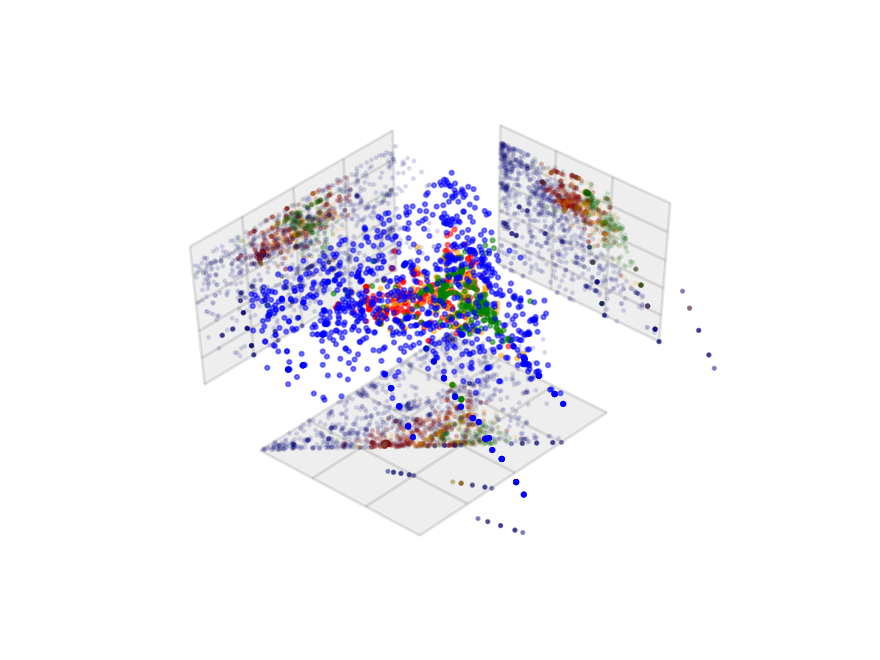

In [6]:
amine_name = "Ethylammonium Iodide" # The ammonium you would like to plot
x_range = [0, 2]
y_range = [0, 5]
z_range = [0, 10.5]
xy_plane = z_range[0] - 3
xz_plane = y_range[1] + 0.1
yz_plane = x_range[0] - 0.5
x_step = 0.5
y_step = 1
z_step = 2

%matplotlib notebook

# 3D plot
point = per3D(df,amine = amine_name,category = None)
color_type = ['blue', 'green','orange','red']
color_type_2D = ['navy', 'darkgreen','orange','darkred']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(1,5):
    s = 5 if i == 4 else 5
    ax.scatter(point[:,0][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               point[:,1][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               point[:,2][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               c = color_type[i-1], s = s, alpha=0.5)



# 2D projections plot
for i in range(1,5):
    s = 3 if i == 4 else 3
    arf = 0.2 if i == 4 else 0.1
    ax.scatter(point[:,0][(point[:,3]==i) & (point[:,0]<x_range[1])],point[:,2][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               marker = 'o', c = color_type_2D[i-1], s = s, zdir = 'y', zs = xz_plane, alpha=arf)
    ax.scatter(point[:,1][(point[:,3]==i) & (point[:,0]<x_range[1])], point[:,2][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               marker = 'o', c = color_type_2D[i-1], s = s, zdir = 'x', zs = yz_plane, alpha=arf)
    ax.scatter(point[:,0][(point[:,3]==i) & (point[:,0]<x_range[1])], point[:,1][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               marker = 'o', c = color_type_2D[i-1], s = s, zdir='z', zs = xy_plane, alpha=arf)

# make 2D planes with meshgrid
yy, zz = np.meshgrid(np.arange(y_range[0],y_range[1], y_step), np.arange(z_range[0],z_range[1],z_step))
xx = np.ones((len(np.arange(z_range[0],z_range[1],z_step)), len(np.arange(y_range[0],y_range[1], y_step))))*yz_plane
ax.plot_surface(xx,yy,zz, color = "silver", alpha = 0.1)
ax.plot_wireframe(xx,yy,zz, color = "black", alpha = 0.1)

xx, yy = np.meshgrid(np.arange(x_range[0],x_range[1], x_step), np.arange(y_range[0],y_range[1], y_step))
zz = np.ones((len(np.arange(y_range[0],y_range[1], y_step)), len(np.arange(x_range[0],x_range[1], x_step))))*xy_plane
ax.plot_surface(xx,yy,zz, color = "silver", alpha = 0.1)
ax.plot_wireframe(xx,yy,zz, color = "black", alpha = 0.1)

xx, zz = np.meshgrid(np.arange(x_range[0],x_range[1], x_step), np.arange(z_range[0],z_range[1],z_step))
yy = np.ones((len(np.arange(z_range[0],z_range[1], z_step)), len(np.arange(x_range[0],x_range[1], x_step))))*xz_plane
ax.plot_surface(xx,yy,zz, color = "silver", alpha = 0.1)
ax.plot_wireframe(xx,yy,zz, color = "black", alpha = 0.1)

ax.set_axis_off()
ax.view_init(elev=45, azim=-70)
ax.set_xlim(yz_plane, x_range[1])
ax.set_ylim(y_range[0],xz_plane)
ax.set_zlim(xy_plane,z_range[1])

plt.savefig('Outcome_plot_'+ amine_name + '_NEW_allrandom.svg', format = "svg", transparent=True)